## Telecom Churn: Logistic Regression with PCA

With 21 predictor variables, we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, customer attrition is referred to as 'churn'.

#### Importing and Merging Data

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [3]:
print(len(churn_data))
print(len(customer_data))
print(len(internet_data))

7043
7043
7043


In [4]:
# Merging on 'customerID'

df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [10]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

#### Let's understand the structure of our dataframe

In [11]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [12]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


#### Data Preparation

In [13]:
# converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes':1, 'No':0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes':1, 'No':0})
telecom['Churn'] = telecom['Churn'].map({'Yes':1, 'No':0})
telecom['Partner'] = telecom['Partner'].map({'Yes':1, 'No':0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes':1, 'No':0})

#### Dummy Variable Creation

In [14]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'], prefix='Contract', drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, cont], axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'], prefix='PaymentMethod', drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, pm], axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'], prefix='gender', drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, gen], axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines', drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, ml], axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'], prefix='InternetService', drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, iser], axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity' and dropping the first one.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity', drop_first=True)
os1 = os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, os1], axis=1)

# Creating a dummy variable for the variable 'OnlineBackup' and dropping the first one.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup', drop_first=True)
ob1 = ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, ob1], axis=1)

# Creating a dummy variable for the variable 'DeviceProtection' and dropping the first one.
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection', drop_first=True)
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, dp1], axis=1)

# Creating a dummy variable for the variable 'TechSupport' and dropping the first one.
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport', drop_first=True)
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, ts1], axis=1)

# Creating a dummy variable for the variable 'StreamingTV' and dropping the first one.
st = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV', drop_first=True)
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, st1], axis=1)

# Creating a dummy variable for the variable 'StreamingMovies' and dropping the first one.
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies', drop_first=True)
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom, sm1], axis=1)

/var/folders/ch/3xtnt0vx13q1n9pmf7ks_nhc0000gn/T/ipykernel_93831/207537967.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1 = os.drop(['OnlineSecurity_No internet service'],1)
/var/folders/ch/3xtnt0vx13q1n9pmf7ks_nhc0000gn/T/ipykernel_93831/207537967.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1 = ob.drop(['OnlineBackup_No internet service'],1)
/var/folders/ch/3xtnt0vx13q1n9pmf7ks_nhc0000gn/T/ipykernel_93831/207537967.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dp1 = dp.drop(['DeviceProtection_No internet service'],1)
/var/folders/ch/3xtnt0vx13q1n9pmf7ks_nhc0000gn/T/ipykernel_93831/207537967.py:46: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument '

#### Dropping the repeated variables

In [15]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

/var/folders/ch/3xtnt0vx13q1n9pmf7ks_nhc0000gn/T/ipykernel_93831/2099888353.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',


In [17]:
# The variable was imported as a string we need to convert it to float
telecom['TotalCharges'] =  pd.to_numeric(telecom['TotalCharges'], errors='coerce')

In [18]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer

#### Checking for Outliers

In [19]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure', 'MonthlyCharges', 'SeniorCitizen', 'TotalCharges']]

In [20]:
# Checking outliers at 25%, 50%, 75%, 90%, 95%, and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, we can see that there no Outliers in our data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

It means that 11/7043 = 0.001561834 i.e. 0.1%, best is to remove these observations from the analysis

In [21]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No phone service           0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_Yes                  

In [22]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [23]:
# Checking the percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_Yes                         0.0
DeviceProt

Now we don't have any missing values

#### Feature Standardisation

In [25]:
df = telecom[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [26]:
normalized_df = (df-df.mean())/df.std()
telecom = telecom.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], 1)
telecom = pd.concat([telecom, normalized_df], axis=1)
telecom.head()

/var/folders/ch/3xtnt0vx13q1n9pmf7ks_nhc0000gn/T/ipykernel_93831/360100370.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], 1)


,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.239416,0.196164,-0.940391


#### Checking the Churn Rate

In [27]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate

#### Model Building

Let's start by spliting our data into a training set and test set.

#### Splitting Data into Training and Test Sets

In [29]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['Churn', 'customerID'], axis=1)

# Putting response variable a
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [30]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

#### Running Our First Training Model

In [31]:
import statsmodels.api as sm

In [32]:
# Logistic regression model
logml = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 07 Oct 2024   Deviance:                       4009.4
Time:                        22:50:03   Pearson chi2:                 6.07e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3056      0.773     -2.984      0.003      -3.820      -0.791
PhoneService                             -0.6774      0.090     -7.499      0.000      -0.855      -0.500
PaperlessBilling                          0.3254      0.090      3.615      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.400      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.333      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.869      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No phone service           -1.6282      0.776     -2.099      0.036      -3.148      -0.108
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.598      0.009       0.617       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.189     -8.024      0.000      -1.891      -1.149
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.093
TotalCharges                              0.7329      0.198      3.708      0.000       0.345       1.120
=========================================================================================================
"""

#### Correlation Matrix

In [33]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/var/folders/ch/3xtnt0vx13q1n9pmf7ks_nhc0000gn/T/ipykernel_93831/1807330179.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(telecom.corr(), annot=True)


<Axes: >

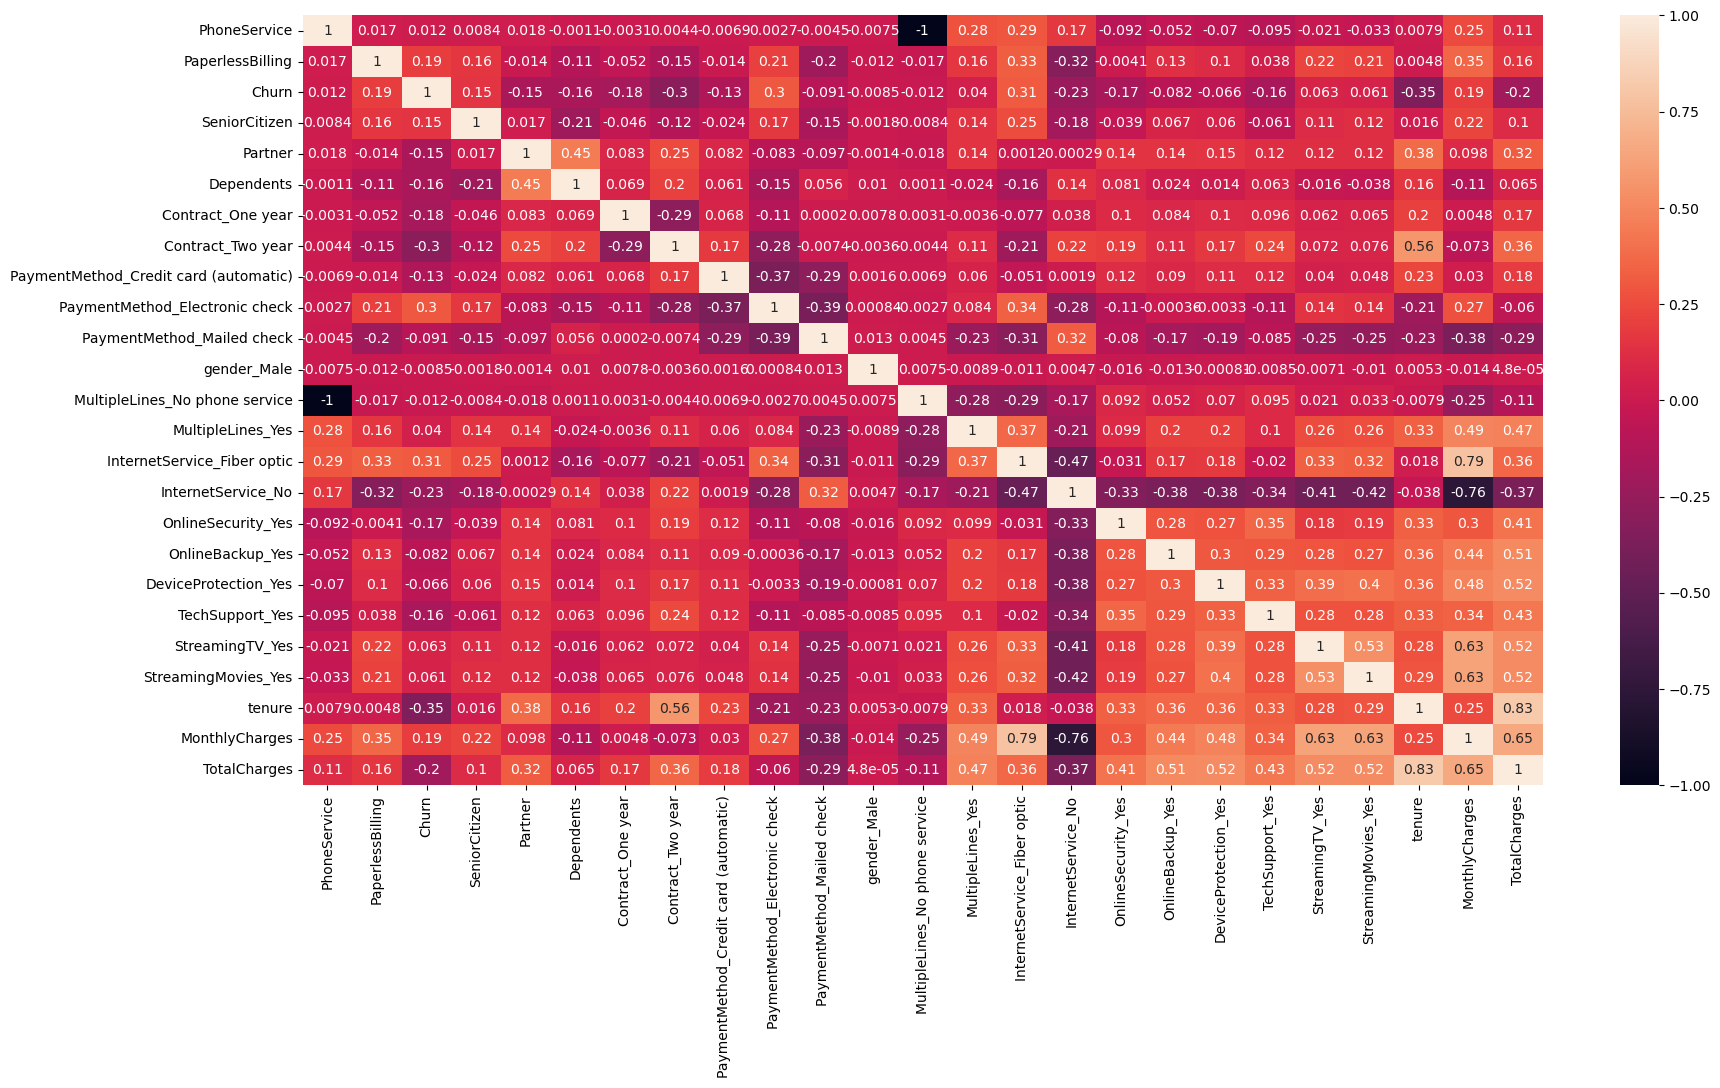

In [34]:
# Let's see the correlation matrix
plt.figure(figsize= (20, 10))
sns.heatmap(telecom.corr(), annot=True)

#### Feature Selection Using RFE

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False  True False False False  True  True False  True False False False
  True  True  True  True False False False  True  True  True  True  True]
[ 6  1  4 12  5  1  1  8  1  9 11  3  1  1  1  1  7 10  2  1  1  1  1  1]


In [39]:
# Variables selected by RFE 
col = X_train.columns[rfe.support_]

In [40]:
col

Index(['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'SeniorCitizen', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

In [42]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [43]:
#Comparing the model with StatsModels
#logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 07 Oct 2024   Deviance:                       4009.4
Time:                        23:07:56   Pearson chi2:                 6.07e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3056      0.773     -2.984      0.003      -3.820      -0.791
PhoneService                             -0.6774      0.090     -7.499      0.000      -0.855      -0.500
PaperlessBilling                          0.3254      0.090      3.615      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.400      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.333      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.869      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No phone service           -1.6282      0.776     -2.099      0.036      -3.148      -0.108
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.598      0.009       0.617       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.189     -8.024      0.000      -1.891      -1.149
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.093
TotalCharges                              0.7329      0.198      3.708      0.000       0.345       1.120
=========================================================================================================
"""

In [44]:
X_test[col].shape
#res = modres.predict(X_test[col])

(2110, 13)

#### Making Predictions

In [45]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.437717
1,0.326804
2,0.004869
3,0.576264
4,0.007746


In [46]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
942,0
3730,1
1761,0
2283,1
1872,0


In [52]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID','Churn','Churn_Prob'])
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,0,0,0.437717
1,1,1,0.326804
2,2,0,0.004869
3,3,1,0.576264
4,4,0,0.007746


In [53]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,0,0,0.437717,0
1,1,1,0.326804,0
2,2,0,0.004869,0
3,3,1,0.576264,1
4,4,0,0.007746,0


#### Model Evaluation

In [54]:
from sklearn import metrics

In [55]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1354,  174],
       [ 248,  334]])

In [56]:
# Predicted     Churn  not_churn  __all__
# Actual
# Churn            1359   169     1528
# not_churn         256   326      582
# __all__          1615   751     2110

In [57]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.8

In [58]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

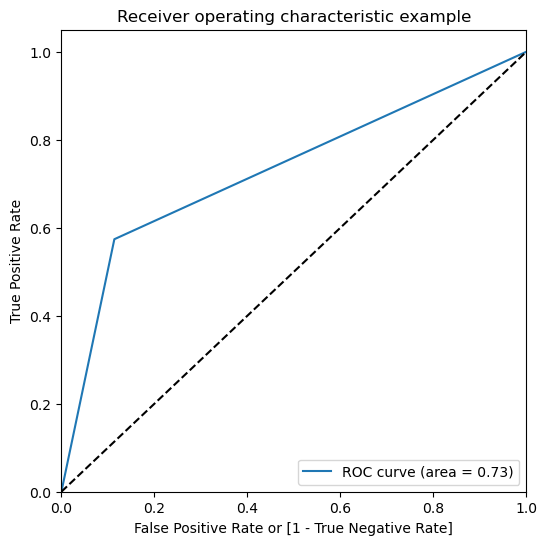

(array([0.        , 0.11387435, 1.        ]),
 array([0.        , 0.57388316, 1.        ]),
 array([inf,  1.,  0.]))

In [59]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [60]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))

'0.83'

#### We see an overall AUC score of 0.83 looks like we did a decent job.
But we did spend a lot of effort on the features and their selection.

Can PCA help reduce our effort?

#### PCA on the data

##### Note -
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [61]:
X_train.shape

(4922, 24)

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(random_state=42)

In [64]:
pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [65]:
pca.components_

array([[ 2.07821126e-02,  7.02543733e-02,  3.43475893e-02,
         9.77584606e-02,  1.32459746e-02,  2.98844515e-02,
         7.79517686e-02,  4.43207991e-02,  1.27885338e-02,
        -9.87466156e-02,  3.25666526e-04, -2.07821126e-02,
         1.58007245e-01,  1.45088417e-01, -1.31538887e-01,
         1.16948137e-01,  1.55371794e-01,  1.61366098e-01,
         1.24479501e-01,  1.76136332e-01,  1.77132819e-01,
         4.49690094e-01,  4.80454751e-01,  5.71236666e-01],
       [-4.45698898e-02, -1.71507958e-01, -8.26908819e-02,
         1.47921560e-01,  1.41352651e-01,  6.22060518e-02,
         2.32779577e-01,  9.10202899e-02, -2.27530368e-01,
         6.83309913e-02,  1.02760242e-02,  4.45698898e-02,
        -5.64581558e-02, -2.97007573e-01,  2.12259262e-01,
         5.65070958e-02, -5.09996746e-03, -1.60419593e-02,
         3.91943727e-02, -1.18854490e-01, -1.16405719e-01,
         5.62575201e-01, -5.27926624e-01,  1.75173748e-01],
       [-2.70324271e-01, -8.64650881e-02, -1.34091557e

Looking at the explained variance ratio for each component

In [66]:
pca.explained_variance_ratio_

array([3.92033550e-01, 1.63496878e-01, 4.93363696e-02, 3.88895442e-02,
       3.64506176e-02, 3.48916716e-02, 3.01855885e-02, 2.88250874e-02,
       2.76184484e-02, 2.63972530e-02, 2.16577786e-02, 2.03913171e-02,
       2.00060561e-02, 1.87138618e-02, 1.74482593e-02, 1.54386234e-02,
       1.53142193e-02, 1.36740743e-02, 8.73542671e-03, 7.81780592e-03,
       7.11822240e-03, 5.50570453e-03, 5.36426437e-05, 1.26329971e-29])

Making a scree plot for the explained variance

In [67]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

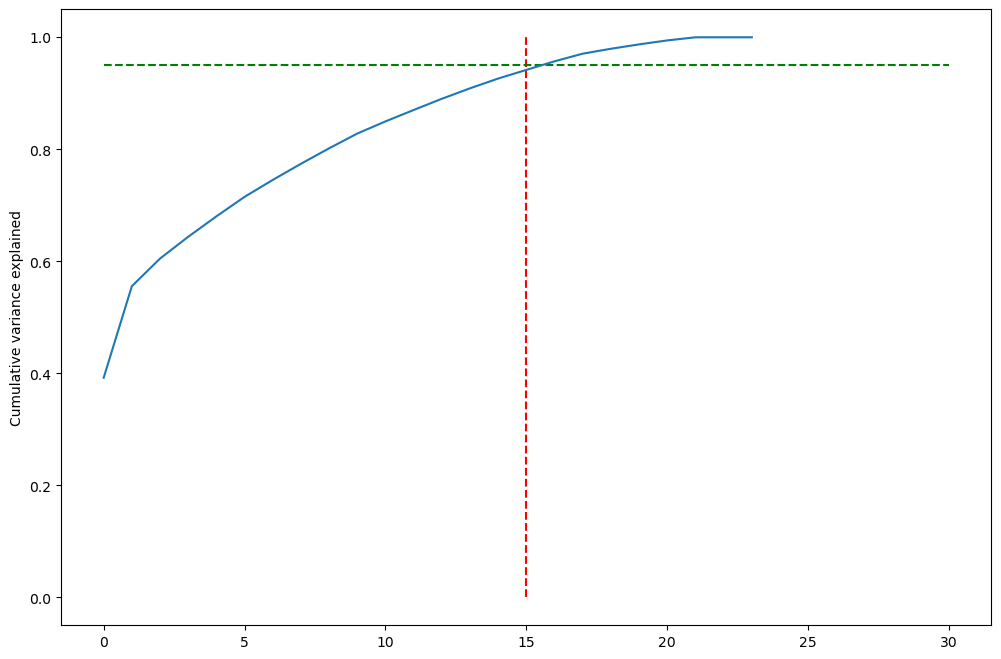

In [68]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Perform PCA with 16 components

In [69]:
from sklearn.decomposition import IncrementalPCA

In [70]:
pca_final = IncrementalPCA(n_components=16)

In [71]:
df_train_pca = pca_final.fit_transform(X_train)

In [72]:
df_train_pca.shape

(4922, 16)

In [73]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [74]:
corrmat.shape

(16, 16)

Plotting the heatmap of the corr matrix

<Axes: >

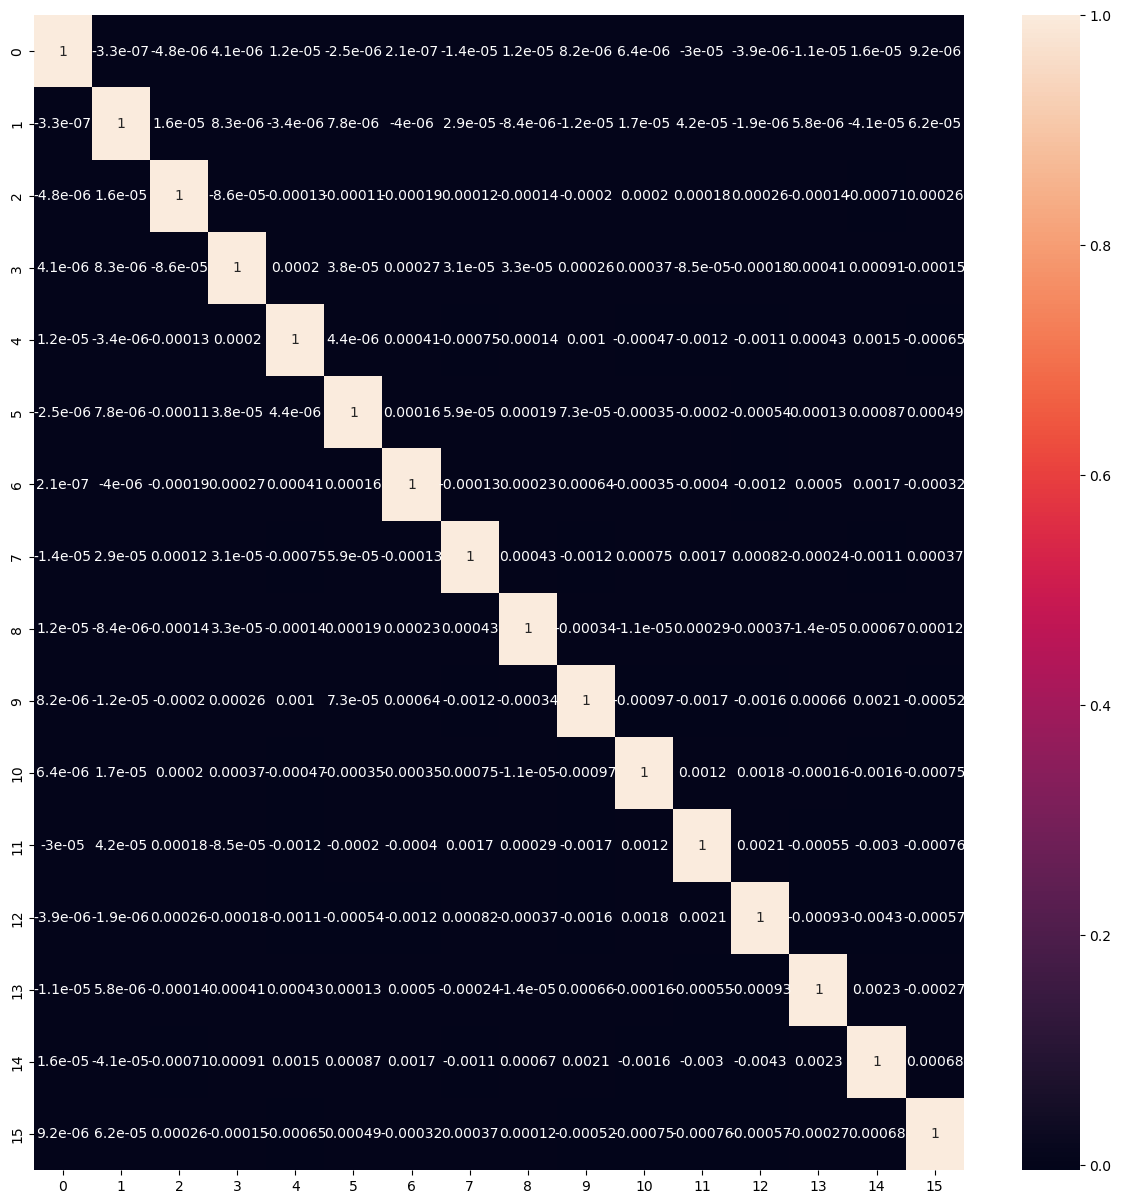

In [75]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [76]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2110, 16)

#### Applying logistic regression on the data on our Principal components

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
learner_pca = LogisticRegression()

In [79]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [80]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [81]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

#### Making it a little more unsupervised

In [82]:
pca_again = PCA(0.9)

In [83]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [84]:
df_train_pca2.shape

(4922, 14)

Following it up with a logistic regression model

In [85]:
learner_pca2 = LogisticRegression()

In [86]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [87]:
df_test_pca2 = pca_again.transform(X_test)

In [88]:
df_test_pca2.shape

(2110, 14)

In [89]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [90]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.83'